# Exploratory Dataset Analysis

In [1]:
# Common
import numpy as np
import re
import tensorflow as tf
import pickle
import string

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Data collection
import pandas as pd

# Data/Result visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
data_df = pd.read_csv("./datasets/emails.csv")

# Preview of training data sample
data_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


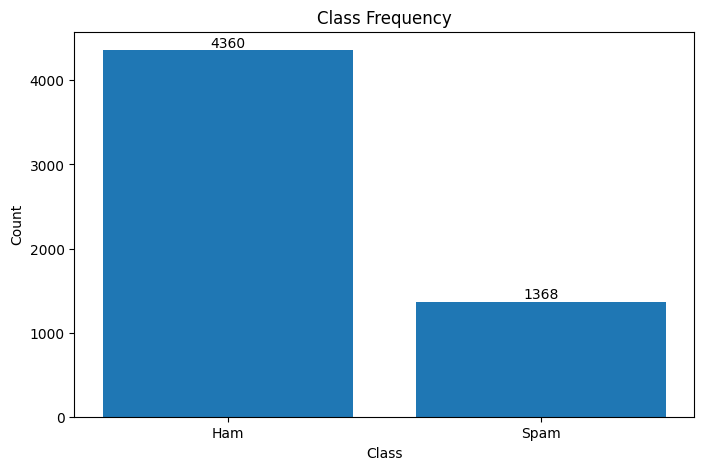

In [3]:
class_counts = data_df['spam'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(['Ham', 'Spam'], class_counts.values)
plt.title("Class Frequency")
plt.xlabel('Class')
plt.ylabel('Count')

# Adding text annotations for each bar
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

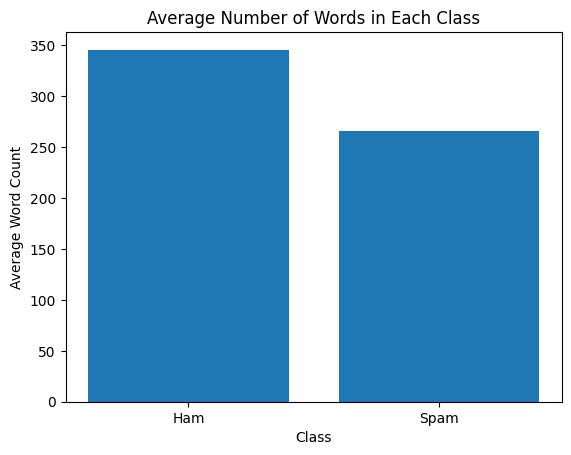

In [4]:
# Adding a new column for the number of words in each text
data_df['Word Count'] = data_df['text'].apply(lambda x: len(x.split()))

# Calculating the average number of words for each class
average_word_count = data_df.groupby('spam')['Word Count'].mean().sort_index()

# Plotting the average word count for each class
plt.bar(['Ham', 'Spam'], average_word_count.values)
plt.xlabel('Class')
plt.ylabel('Average Word Count')
plt.title('Average Number of Words in Each Class')
plt.show()

In [5]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove numbers and punctuation
    tokens = [token for token in tokens if token.isalpha() and token not in string.punctuation]
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)


In [6]:
# Preprocess the training and testing datasets
data_df['preprocessed_text'] = data_df['text'].apply(preprocess_text)

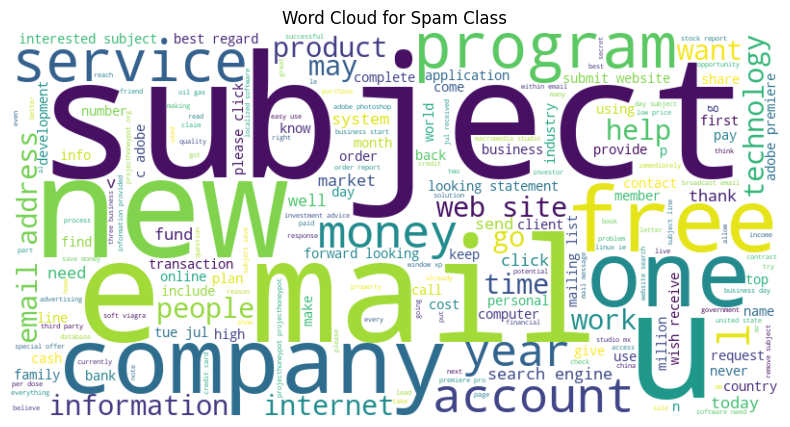

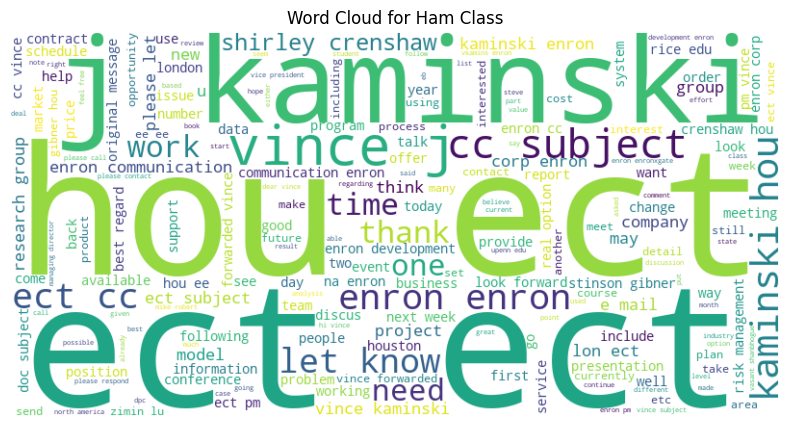

In [7]:
# Visualize the most common words in the dataset
def plot_wordcloud(label, text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label} Class')
    plt.axis('off')
    plt.show()

# Create a word cloud for disaster tweets
spam_emails = data_df[data_df['spam'] == 1]['preprocessed_text'].str.cat(sep=' ')
plot_wordcloud('Spam', spam_emails)

# Create a word cloud for non-disaster tweets
ham_emails = data_df[data_df['spam'] == 0]['preprocessed_text'].str.cat(sep=' ')
plot_wordcloud('Ham', ham_emails)

# Resample the Dataset

In [8]:
import numpy 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [9]:
ham_rows = data_df[data_df['spam'] == 0]
spam_rows = data_df[data_df['spam'] == 1]

In [10]:
ham_resampled_test_df = resample(ham_rows, n_samples=113, replace=False, random_state=0)
spam_resampled_test_df = resample(spam_rows, n_samples=113, replace=False, random_state=0)

# Concatenate the test sets for each class
test_df = pd.concat([ham_resampled_test_df, spam_resampled_test_df])
test_df = test_df.drop('text', axis=1)
test_df = test_df.drop('Word Count', axis=1)
test_df.rename(columns={'preprocessed_text': 'text'}, inplace=True)
test_df = test_df.sample(frac=1, random_state=0)

In [11]:
# Remove the test set samples from the original DataFrame to create the training set
train_df = data_df.drop(test_df.index)

# Resample the training set to achieve the desired class balance
ham_resampled_train_df = resample(train_df[train_df['spam'] == 0], n_samples=3000, replace=True, random_state=0)
spam_resampled_train_df = resample(train_df[train_df['spam'] == 1], n_samples=2000, replace=True, random_state=0)

train_resampled_df = pd.concat([ham_resampled_train_df, spam_resampled_train_df])
train_resampled_df = train_resampled_df.drop('text', axis=1)
train_resampled_df = train_resampled_df.drop('Word Count', axis=1)
train_resampled_df.rename(columns={'preprocessed_text': 'text'}, inplace=True)
train_resampled_df = train_resampled_df.sample(frac=1, random_state=0)

In [12]:
test_df.head()

,spam,text
202,1,subject perfect logo charset koi r thinking br...
5704,0,subject storage model security stinson added t...
1350,1,subject wall street micro news report homeland...
303,1,subject logo stationer website design much lt ...
2103,0,subject video conference ross mcintyre vince r...


In [13]:
train_resampled_df.head()

,spam,text
5276,0,subject institute international finance annual...
660,1,subject mortgage even worst credit zwzm detail...
60,1,subject partnership mr edward moko independenc...
1291,1,subject de la part de enfants ama rue de marty...
3662,0,subject synfuel option valuation lenny believe...


In [14]:
train_resampled_df.to_csv('./datasets/train.csv', index=False)
test_df.to_csv('./datasets/test.csv', index=False)


In [16]:
len(train_resampled_df)

5000

In [15]:
len(test_df)

226